# Customer Alliance Hotel Ranking Project


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data

In [2]:
# importing data while parsing 'crawled_at' column as datetime object

data_df = pd.read_csv('TA_CityRank_Hack_DD_pull_1.csv', sep=';', low_memory=False, skipinitialspace=True, 
                      parse_dates=['crawled_at'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
     print(data_df.head(10))

   hotel_id                   hotel_name         street zip_code    city  \
0     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   
1     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   
2     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   
3     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   
4     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   
5     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   
6     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   
7     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   
8     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   
9     62051  Le Grand Mellis Hotel & Spa  Müllerstr. 74    13349  Berlin   

  country crawled_at  review_count_state  average_rating_state  \
0      US 2015-01-04                  26                  70.0   
1      US 2015-02-25           

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74317 entries, 0 to 74316
Data columns (total 61 columns):
hotel_id                                 74317 non-null int64
hotel_name                               74317 non-null object
street                                   74317 non-null object
zip_code                                 74317 non-null object
city                                     74317 non-null object
country                                  74317 non-null object
crawled_at                               74317 non-null datetime64[ns]
review_count_state                       74317 non-null int64
average_rating_state                     74317 non-null float64
sleep_rating_state                       26375 non-null float64
location_rating_state                    26378 non-null float64
room_rating_state                        26382 non-null float64
service_rating_state                     26385 non-null float64
value_rating_state                       26371 non-null float

In [4]:
data_df.describe()

,hotel_id,review_count_state,average_rating_state,sleep_rating_state,location_rating_state,room_rating_state,service_rating_state,value_rating_state,clean_rating_state,city_rank,...,value_rating_positive_count_todate,value_rating_neutral_count_todate,value_rating_negative_count_todate,value_rating_count_todate,value_rating_normalized_todate,clean_rating_positive_count_todate,clean_rating_neutral_count_todate,clean_rating_negative_count_todate,clean_rating_count_todate,clean_rating_normalized_todate
count,74317.000000,74317.000000,74317.000000,26375.000000,26378.000000,26382.000000,26385.000000,26371.000000,26380.000000,56743.000000,...,74317.000000,74317.000000,74317.000000,74317.000000,74317.000000,74317.000000,74317.000000,74317.000000,74317.000000,74317.000000
mean,68019.046530,631.930527,81.853815,83.876398,85.101979,80.583731,83.043775,79.347389,86.754359,66.060483,...,0.229651,0.066028,0.009244,0.304924,19.177719,0.261730,0.035887,0.005665,0.303282,20.603741
std,42046.604747,588.679275,8.758977,8.075807,9.823432,9.377765,8.512499,8.333831,8.418496,174.013425,...,0.571441,0.281357,0.096123,0.694096,35.589917,0.610784,0.212229,0.077174,0.695395,37.977449
min,20469.000000,1.000000,40.000000,20.000000,50.000000,40.000000,40.000000,30.000000,40.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29668.000000,189.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52851.000000,454.000000,80.000000,80.000000,90.000000,80.000000,80.000000,80.000000,90.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,99421.000000,899.000000,90.000000,90.000000,90.000000,90.000000,90.000000,80.000000,90.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,156761.000000,3459.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1699.000000,...,15.000000,7.000000,2.000000,23.000000,100.000000,17.000000,6.000000,2.000000,22.000000,100.000000


### Data Integrity Check and EDA

In [5]:
# How many hotels before dropping rows where city_rank (response) is NA? 685 hotels assuming there is one hotel which has two
# hotel_ids

data_df['hotel_id']=data_df['hotel_id'].astype(str)
print(data_df[['hotel_id','hotel_name']].nunique())

hotel_id      685
hotel_name    684
dtype: int64


In [6]:
# How many hotels after dropping rows where city_rank (response) is NA? 641, so we lose 44 hotels which have no useful data
print(data_df[data_df['city_rank'].notna()].shape)
print(data_df[data_df['city_rank'].notna()][['hotel_id','hotel_name']].nunique())

(56743, 61)
hotel_id      641
hotel_name    641
dtype: int64


In [7]:
# storing the rows of the nan city_rank out of main dataframe. 17,574 rows linked to 630 hotels

data_missing_df=data_df[data_df['city_rank'].isna()]
print(data_missing_df.shape)
print(data_missing_df[['hotel_id','hotel_name']].nunique())

(17574, 61)
hotel_id      630
hotel_name    629
dtype: int64


In [8]:
# storing the rows with a non-null value for city_rank in another dataframe

data_clean_df=data_df[data_df['city_rank'].notna()]

In [9]:
# storing the list of the 44 hotels with no useable data 

data_missing_hotels_id = set(data_df['hotel_id'])-set(data_clean_df['hotel_id'])
data_missing_hotels_name = set(data_df['hotel_name'])-set(data_clean_df['hotel_name'])

In [10]:
data_missing_hotels_id

{'101501',
 '104721',
 '109811',
 '109821',
 '109831',
 '115841',
 '117321',
 '134881',
 '140741',
 '145601',
 '156761',
 '21279',
 '21821',
 '22066',
 '22590',
 '22591',
 '24750',
 '26049',
 '28352',
 '28353',
 '30149',
 '30150',
 '30211',
 '41271',
 '41441',
 '49751',
 '49941',
 '52751',
 '58701',
 '59071',
 '59211',
 '61941',
 '62261',
 '74181',
 '75811',
 '75821',
 '77311',
 '85471',
 '85501',
 '86791',
 '92051',
 '93991',
 '96731',
 '99471'}

In [11]:
# examining the rows of an example of these hotels. 

data_missing_example_df = data_df[data_df['hotel_id'] == '75821']

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
     print(data_missing_example_df.head())

    hotel_id   hotel_name                street zip_code   city country  \
584    75821  Hotel Maien  19 Boulevard Diderot    75012  Paris      FR   
585    75821  Hotel Maien  19 Boulevard Diderot    75012  Paris      FR   
586    75821  Hotel Maien  19 Boulevard Diderot    75012  Paris      FR   
587    75821  Hotel Maien  19 Boulevard Diderot    75012  Paris      FR   
588    75821  Hotel Maien  19 Boulevard Diderot    75012  Paris      FR   

    crawled_at  review_count_state  average_rating_state  sleep_rating_state  \
584 2015-06-10                  11                  80.0                70.0   
585 2015-06-07                  10                  80.0                70.0   
586 2015-05-06                   9                  80.0                70.0   
587 2015-04-27                   8                  80.0                70.0   
588 2015-02-18                   7                  70.0                70.0   

     location_rating_state  room_rating_state  service_rating_state 

### Segmenting the clean data into Berlin and Paris

In [13]:
print(data_clean_df['city'].value_counts(),'\n')
print(data_clean_df['country'].value_counts(),'\n')    

Berlin               28738
Paris                18338
PARIS                 1304
Paris 03              1180
Paris 11              1091
Paris 06              1063
Paris 14               861
Paris 12               802
Paris 17               603
Paris 09               590
Paris 04               554
Paris 15               507
Berlin-Karow           225
Paris 10               211
Paris 16               180
Paris 07               159
berlin                 128
Paris 01                63
Paris 08                55
Berlin-Schönefeld       49
Berlingerode            30
Paris 05                11
Paris 18                 1
Name: city, dtype: int64 

DE    29161
FR    27522
US       60
Name: country, dtype: int64 



In [14]:
# we are targeting the data in Paris FR and Berlin DE. Dropping US rows

data_clean_df=data_clean_df[data_clean_df['country']!='US']
print(data_clean_df['country'].value_counts(),'\n')  

DE    29161
FR    27522
Name: country, dtype: int64 



In [15]:
# converting city name to all lower case

data_clean_df['city']=data_clean_df['city'].str.lower()
print(data_clean_df['city'].value_counts(),'\n') 

berlin               28806
paris                19642
paris 03              1180
paris 11              1091
paris 06              1063
paris 14               861
paris 12               802
paris 17               603
paris 09               590
paris 04               554
paris 15               507
berlin-karow           225
paris 10               211
paris 16               180
paris 07               159
paris 01                63
paris 08                55
berlin-schönefeld       49
berlingerode            30
paris 05                11
paris 18                 1
Name: city, dtype: int64 



In [16]:
data_clean_df[(data_clean_df['country']=='DE')].shape

(29161, 61)

In [17]:
sum(data_clean_df['city'].str.contains('berlin'))

29110

In [18]:
data_clean_df[['city', 'country']].isnull().sum()

city       0
country    0
dtype: int64

In [19]:
# storing Berlin Germany data in a separate dataframe

berlin_df=data_clean_df[(data_clean_df['country']=='DE') & (data_clean_df['city'].str.contains('berlin'))]
berlin_df.shape

(29110, 61)

In [20]:
# storing Paris France data in a separate dataframe

paris_df=data_clean_df[(data_clean_df['country']=='FR') & (data_clean_df['city'].str.contains('paris'))]
paris_df.shape

(27522, 61)

### Verifying features' definitions

In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
     print(berlin_df.head())

      hotel_id             hotel_name                         street zip_code  \
36921    59871  NH Milano 2 Residence  Gertrud-Kolmar-Stra&szlig;e 5    10117   
36922    59871  NH Milano 2 Residence  Gertrud-Kolmar-Stra&szlig;e 5    10117   
36923    59871  NH Milano 2 Residence  Gertrud-Kolmar-Stra&szlig;e 5    10117   
36924    59871  NH Milano 2 Residence  Gertrud-Kolmar-Stra&szlig;e 5    10117   
36925    59871  NH Milano 2 Residence  Gertrud-Kolmar-Stra&szlig;e 5    10117   

         city country crawled_at  review_count_state  average_rating_state  \
36921  berlin      DE 2015-08-26                 330                  70.0   
36922  berlin      DE 2015-08-29                 331                  70.0   
36923  berlin      DE 2015-08-30                 332                  70.0   
36924  berlin      DE 2015-09-02                 333                  70.0   
36925  berlin      DE 2015-09-03                 333                  70.0   

       sleep_rating_state  location_rating_s

** Important Equations **

- response_rate_count_todate = response_rate_negative_count_todate + response_rate_neutral_count_todate+response_rate_positive_count_todate

- response_rate_todate = (response_rate_negative_todate + response_rate_neutral_todate + response_rate_positive_todate)/3 ?

-  average_rating_count_todate = average_rating_negative_count_todate + average_rating_neutral_count_todate + average_rating_positive_count_todate

- previous equation also applies to clean, service, location, value, room, sleep

- All ratings values (not counts) are on a percentile scale 

- Cities appears to be on area NOT city                            

## Weekly stats for Paris

In [22]:
# indexing the city by date only to get weekly averages

paris_byhotel_bydate_df = paris_df.set_index(['hotel_id','crawled_at']).copy()

In [25]:
paris_byhotel_bydate_df.head(20)

hotel_name                         street  \
hotel_id crawled_at                                                          
156751   2016-08-17  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-07-27  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-07-24  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-07-20  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-07-04  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-06-29  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-06-26  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-06-21  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-06-05  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-05-29  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-05-25  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-05-18  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-05-04  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-05-02  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-04-27  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-04-04  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-03-21  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-03-14  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-03-05  ibis Styles Draguignan  15 rue de la Grande Chaumière   
         2016-03-04  ibis Styles Draguignan  15 rue de la Grande Chaumière   

                    zip_code   city country  review_count_state  \
hotel_id crawled_at                                               
156751   2016-08-17    75006  paris      FR                 146   
         2016-07-27    75006  paris      FR                 145   
         2016-07-24    75006  paris      FR                 144   
         2016-07-20    75006  paris      FR                 143   
         2016-07-04    75006  paris      FR                 141   
         2016-06-29    75006  paris      FR                 141   
         2016-06-26    75006  paris      FR                 140   
         2016-06-21    75006  paris      FR                 138   
         2016-06-05    75006  paris      FR                 137   
         2016-05-29    75006  paris      FR                 136   
         2016-05-25    75006  paris      FR                 135   
         2016-05-18    75006  paris      FR                 133   
         2016-05-04    75006  paris      FR                 132   
         2016-05-02    75006  paris      FR                 132   
         2016-04-27    75006  paris      FR                 131   
         2016-04-04    75006  paris      FR                 130   
         2016-03-21    75006  paris      FR                 129   
         2016-03-14    75006  paris      FR                 128   
         2016-03-05    75006  paris      FR                 126   
         2016-03-04    75006  paris      FR                 126   

                     average_rating_state  sleep_rating_state  \
hotel_id crawled_at                                             
156751   2016-08-17                  60.0                 NaN   
         2016-07-27                  60.0                 NaN   
         2016-07-24                  60.0                 NaN   
         2016-07-20                  60.0                 NaN   
         2016-07-04                  60.0                 NaN   
         2016-06-29                  60.0                 NaN   
         2016-06-26                  60.0                 NaN   
         2016-06-21                  60.0                 NaN   
         2016-06-05                  60.0                 NaN   
         2016-05-29                  60.0                 NaN   
         2016-05-25                  60.0                 NaN

In [26]:
paris_byhotel_bydate_df.shape

(27522, 59)

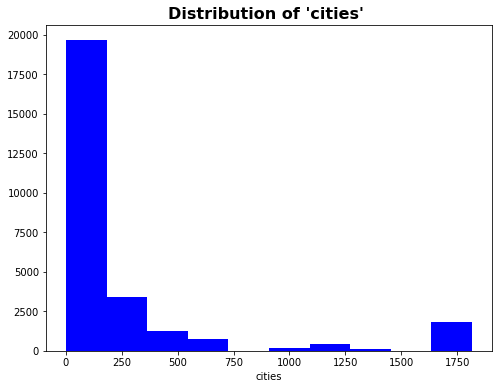

In [27]:
# histograms of cities column. Cities are the number of hotels per area and not per city

fig, axes = plt.subplots(figsize=(8,6))
axes.hist(paris_byhotel_bydate_df['cities'], color="blue")
axes.set_title("Distribution of 'cities' ", fontsize=16, fontweight='bold')
axes.set_xlabel("cities");

In [28]:
# for state columns, we should take the maximum of the week for every hotel 
# extracting cols with 'state' in them

state_cols = [col for col in paris_byhotel_bydate_df if 'state' in col]
print(state_cols)

['review_count_state', 'average_rating_state', 'sleep_rating_state', 'location_rating_state', 'room_rating_state', 'service_rating_state', 'value_rating_state', 'clean_rating_state']


In [30]:
# storing the maxima of all state features weekly for Paris (for every hotel in Paris)

paris_df.groupby(['hotel_id', pd.Grouper(key='crawled_at', freq='W')])[state_cols].max()

review_count_state  average_rating_state  \
hotel_id crawled_at                                             
101041   2015-08-30                 339                 100.0   
         2015-09-13                 340                 100.0   
         2015-09-20                 341                 100.0   
         2015-10-04                 343                 100.0   
         2015-10-11                 345                 100.0   
         2015-10-18                 346                 100.0   
         2015-10-25                 347                 100.0   
         2015-11-01                 349                 100.0   
         2015-11-08                 349                 100.0   
         2015-11-29                 351                 100.0   
         2015-12-13                 352                 100.0   
         2015-12-20                 353                 100.0   
         2016-02-07                 354                 100.0   
         2016-02-14                 356                 100.0   
         2016-04-24                 357                 100.0   
         2016-05-08                 358                 100.0   
         2016-05-22                 359                 100.0   
         2016-05-29                 360                 100.0   
         2016-06-19                 362                 100.0   
         2016-06-26                 363                 100.0   
         2016-07-17                 364                 100.0   
         2016-08-07                 365                 100.0   
         2016-10-09                 370                 100.0   
         2016-10-16                 371                 100.0   
         2016-10-23                 372                 100.0   
         2016-10-30                 373                 100.0   
         2016-12-04                 374                 100.0   
         2017-01-15                 375                 100.0   
         2017-01-22                 376                 100.0   
         2017-02-19                 378                 100.0   
...                                 ...                   ...   
98291    2016-06-26                  32                  80.0   
         2016-07-03                  33                  80.0   
         2016-07-24                  34                  80.0   
         2016-08-21                  37                  80.0   
         2016-09-25                  40                  80.0   
         2016-10-02                  41                  80.0   
         2016-10-09                  42                  80.0   
         2016-10-16                  43                  80.0   
         2016-10-23                  45                  80.0   
         2016-10-30                  46                  80.0   
         2016-12-04                  47                  80.0   
         2017-01-15                  48                  80.0   
         2017-02-26                  50                  80.0   
         2017-03-12                  51                  80.0   
         2017-03-19                  52                  80.0   
         2017-04-09                  53                  80.0   
         2017-04-16                  54                  80.0   
         2017-04-30                  56                  80.0   
         2017-05-07                  57                  80.0   
         2017-07-02                  58                  80.0   
         2017-07-30                  60                  80.0   
         2017-08-27                  61                  80.0   
         2017-09-10                  62                  80.0   
         2017-09-17                  63                  80.0   
         2017-10-01                  64                  80.0   
         2017-10-08                  65                  80.0   
         2018-02-04                  66                  80.0   
         2018-02-25                  67                  80.0   
99751    2017-10-08                   2                 

In [ ]:
paris_byweek_state_df.head()

In [ ]:
# Check.... review state count should be ever increasing
paris_byweek_state_df.reset_index(inplace=True)
plt.figure(figsize=(15,15))
sns.pointplot(x= 'crawled_at', y='review_count_state', data=paris_byweek_state_df)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(paris_byweek_state_df[['crawled_at', 'review_count_state']])

In [ ]:
paris_byweek_df.head()

In [ ]:
paris_byweek_df.reset_index(inplace=True)
paris_byweek_df.head()

In [ ]:
paris_bydate_df.head()

In [ ]:
paris_bydate_df.reset_index(inplace=True)
paris_bydate_df['month']=paris_bydate_df['crawled_at'].dt.month
paris_bydate_df['year']=paris_bydate_df['crawled_at'].dt.year

In [ ]:
paris_bydate_df.head(10)

In [ ]:
paris_bydate_df['day']=paris_bydate_df['crawled_at'].dt.day

In [ ]:
paris_bydate_df.head()

In [ ]:
# checking mean and sum for week: august , 2015, day up to 23

_=paris_bydate_df[paris_bydate_df['month']==]

In [ ]:
paris_byweek_df.info()

In [ ]:
np.array(paris_byweek_df['review_count_state'])

In [ ]:
np.array(paris_byweek_df['crawled_at'])

In [ ]:
plt.figure(figsize=(8,6))

sns.pointplot(x='crawled_at', y='review_count_state', data=paris_byweek_df)

In [ ]:
# check...review_count_state should be steady or increasing with time

#plt.figure(figsize=(8,6))
plt.plot(x=np.array(paris_byweek_df['crawled_at']), y=np.array(paris_byweek_df['review_count_state']))
#plt.gcf().autofmt_xdate()
plt.show()
#plt.title('Average Review Count Vs. Time in Paris', fontweight='bold', fontsize=16);

In [ ]:
# grouping the rows by week

#paris_bydate_grouped_df = paris_bydate_df.groupby([paris_bydate_df.index.get_level_values(0), pd.Grouper(freq='W', level=0)])

#grouped = RA_monthly_ts.groupby([RA_monthly_ts.index.get_level_values(0),pd.Grouper(freq='M', level=1)])
#RA_monthly_ts_grouped = grouped.sum().astype(int)

In [ ]:
paris_bydate_grouped_df.head()

In [ ]:
# indexing the city by hotel id and date to create features for weekly increments in counts referenced to weekly averges

paris_byhote_bydate_df = paris_df.set_index(['hotel_id','crawled_at']).copy()

In [ ]:
paris_df.head()

In [ ]:
paris_df.describe(include=['O'])

In [ ]:
paris_df.info()

In [ ]:
paris_df.loc[156751][['average_rating_count_todate','response_rate_count_todate']] # time-series data for a single hotel

In [ ]:
# finding out the mobthly sum and average reviews number and response per hotel id 

grouped = paris_df[['average_rating_count_todate','response_rate_count_todate']].groupby([paris_df.index.get_level_values(0),pd.Grouper(freq='M', level=1)])
paris_df_monthlysum = grouped.sum().astype(int)

In [ ]:
paris_df_grouped.loc[156751]

In [ ]:
paris_df_monthlysum.head(20)